In [18]:

import requests
from bs4 import BeautifulSoup

import pickle

from nltk_helpers import get_sentiments

from imdb import IMDb
from imdb.helpers import sortedSeasons


ia=IMDb()


#tt  whole  0944947
#tt  title  5924366
#tt         6027908
#tt         6027912
#tt         6027914
#tt         6027916
#tt         6027920

series = ia.get_movie('0944947')


ia.update(series, 'episodes')
for season_nr in sorted(series['episodes']):
    for episode_nr in sorted(series['episodes'][season_nr]):
        episode = series['episodes'][season_nr][episode_nr]
        print('episode #%s.%s; rating: %s; votes: %s; title:%s; episodeID:%s' %
              (season_nr, episode_nr, episode.get('rating'), episode.get('votes'),episode.get('title'),episode.get('episodeID')))
        
        



count=0

Season8=['5924366','6027908','6027912','6027914','6027916','6027920']


RawReview=[]
counter=0

for season in Season8:
    movie=ia.get_episode(season)
    reviews=ia.get_movie_reviews(season)
    for review in reviews['data']['reviews']:
         count+=1
         #RawReview.insert(++counter,review['content'])
         RawReview.append(review['content'])
         
         #print(review['content'])
          
        
         
#created a pickle file
         
with open('season8.pkl', 'wb') as f:
    pickle.dump(RawReview,f)


#Reading the pickle file

with open('season8.pkl','rb') as f:
    sentis =pickle.load(f)


#sentiment of first one

print('---------------------',get_sentiments((sentis[0].text)))
#print('---------------------',get_sentiments(sentis[1]))





#print(reviews['data']['reviews'][0]['content'])

s=0

for senti in sentis:
    s+=1
    #print(get_sentiments(senti))

  print('test',s)

print(count)
    
    





IndentationError: unindent does not match any outer indentation level (<tokenize>, line 87)

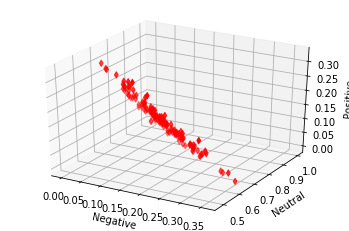

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#build our figure


fig = plt.figure()

# build axis

ax=fig.add_subplot(111, projection='3d')

'''
sentiments =[get_sentiments(tweet.text) for tweet in tweets]
#build our xs, ys, zs

xs=[]

for sent in sentiments:
    xs.append(sent['neg'])
    
ys = [sent['neu'] for sent in sentiments]
zs = list(map(lambda x: x['pos'], sentiments))
    
print(xs)
print(ys)
print(zs)

ax.scatter(xs,ys,zs)

'''
#add another set of data



from nltk_helpers import split_sentiments

dataX, dataY, dataZ = split_sentiments([get_sentiments(tweet) for tweet in sentis])

ax.scatter(dataX, dataY, dataZ, color='r',marker='d')





ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')




plt.show()




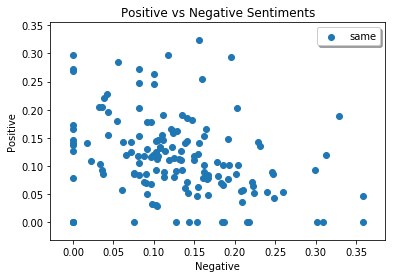

In [16]:


#plt.scatter(dataX,dataY,color='r',marker='*',label='idk')

plt.xlabel('Negative')
plt.ylabel('Positive')

plt.title('Positive vs Negative Sentiments')



plt.scatter(dataX,dataZ,label='same')

plt.legend(loc='upper right', shadow=True)


plt.show()